In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [5]:
############# define run locations #############
short_locs = [#'/home/jtindall/WatChMaL/outputs/2021-03-16/20-21-15/outputs'
              #'/home/jtindall/WatChMaL/outputs/2021-03-03/no_drop_last_full/outputs'
             ]

short_titles = [#'Short Tank',
                'Fitqun']

full_locs = []

full_titles = []

short_linecolor = [c[0] for _ in range(2)]
short_linestyle = ['--' for _ in range(2)]

full_linecolor = [c[1] for _ in full_locs]
full_linestyle = [':' for _ in full_locs]


In [6]:
#fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [7]:
locs = short_locs + full_locs
titles = short_titles + full_titles
linecolor = short_linecolor + full_linecolor
linestyle = short_linestyle + full_linestyle

In [8]:
############# load short tank run data #############
short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in short_locs]
short_raw_actual_labels     = [np.load(loc + "/labels.npy") for loc in short_locs]

In [9]:
# Verify outputs

In [10]:
## Load fitqun results

In [11]:
# Retrieve flags
gamma_file_data = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_gamma_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']
e_file_data     = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_e-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']
mu_file_data    = uproot.open('/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_mu-_E0to1000MeV_unif-pos-R400-y300cm_4pi-dir.fiTQun.root')['fiTQun;1']

In [12]:
print(gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg'])
print(gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg'][1, 0])
print(gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg'][2])
print(gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg'][8])
print(gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg'][:, 0, 1])

[[[0, 0, 0, 0, 0, 0, 0]], [[0, 1, 1, 1, 0, ... 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0]]]
[0, 1, 1, 1, 0, 0, 0]
[[0, 0, 0, 0, 0, 0, 0]]
[[0, 1, 0, 0, 0, 0, 0]]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ... 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]


In [13]:
print(e_file_data.arrays('fq1rnll')['fq1rnll'][0, 0])

[0, 5.27e+03, 5.28e+03, 5.2e+03, 0, 0, 0]


In [14]:
gamma_flags = gamma_file_data.arrays('fq1rpcflg')['fq1rpcflg']
e_flags     = e_file_data.arrays('fq1rpcflg')['fq1rpcflg']
mu_flags    = mu_file_data.arrays('fq1rpcflg')['fq1rpcflg']

gamma_fq1rpcflg_1 = np.array(gamma_flags[:, 0, 1])
e_fq1rpcflg_1     = np.array(e_flags[:, 0, 1])
mu_fq1rpcflg_1    = np.array(mu_flags[:, 0, 1])

gamma_fq1rpcflg_2 = np.array(gamma_flags[:, 0, 2])
e_fq1rpcflg_2     = np.array(e_flags[:, 0, 2])
mu_fq1rpcflg_2    = np.array(mu_flags[:, 0, 2])

In [15]:
e_set_nll    = e_file_data.arrays('fq1rnll')['fq1rnll']

e_set_e_nll  = e_set_nll[:, 0, 1]
e_set_mu_nll = e_set_nll[:, 0, 2]

e_set_discriminator = np.array(e_set_mu_nll - e_set_e_nll)# / (e_set_mu_nll + e_set_e_nll)) #/ np.array(e_set_mu_nll + e_set_e_nll)

In [16]:
print(e_set_discriminator)

[ 10.574707 558.58203   36.09204  ...   0.        -9.158112 379.48828 ]


In [17]:
gamma_set_nll    = gamma_file_data.arrays('fq1rnll')['fq1rnll']

gamma_set_e_nll  = gamma_set_nll[:, 0, 1]
gamma_set_mu_nll = gamma_set_nll[:, 0, 2]

gamma_set_discriminator = np.array(gamma_set_mu_nll - gamma_set_e_nll) #/ np.array(gamma_set_mu_nll + gamma_set_e_nll)

In [18]:
mu_set_nll    = mu_file_data.arrays('fq1rnll')['fq1rnll']

mu_set_e_nll  = mu_set_nll[:, 0, 1]
mu_set_mu_nll = mu_set_nll[:, 0, 2]

mu_set_discriminator = np.array(mu_set_mu_nll - mu_set_e_nll) #/ np.array(mu_set_mu_nll + mu_set_e_nll)

In [19]:
print(np.array(gamma_set_e_nll).shape)

(1200000,)


In [35]:
print(mu_set_discriminator[(mu_fq1rpcflg_1 == 0) & (mu_fq1rpcflg_2 == 0)].shape)

(893794,)


In [36]:
print(e_set_discriminator[(e_fq1rpcflg_1 == 0) & (e_fq1rpcflg_2 == 0)].shape)

(899867,)


In [21]:
print(e_set_discriminator[(e_fq1rpcflg_1 != 0) | (e_fq1rpcflg_2 != 0)])

[ 36.09204  652.1045   322.08984  ...   0.        -9.158112 379.48828 ]


In [22]:
fq_likelihoods = np.concatenate((e_set_discriminator[(e_fq1rpcflg_1 == 0) & (e_fq1rpcflg_2 == 0)],
                                 mu_set_discriminator[(mu_fq1rpcflg_1 == 0) & (mu_fq1rpcflg_2 == 0)],
                                 gamma_set_discriminator[(gamma_fq1rpcflg_1 == 0) & (gamma_fq1rpcflg_2 == 0)]
                                ))

In [23]:
fq_labels = np.concatenate((np.ones_like(e_set_discriminator[(e_fq1rpcflg_1 == 0) & (e_fq1rpcflg_2 == 0)])*1,
                            np.ones_like(mu_set_discriminator[(mu_fq1rpcflg_1 == 0) & (mu_fq1rpcflg_2 == 0)])*2,
                            np.ones_like(gamma_set_discriminator[(gamma_fq1rpcflg_1 == 0) & (gamma_fq1rpcflg_2 == 0)])*0
                            ))

In [24]:
fq_scores = np.zeros((fq_likelihoods.shape[0], 3))
fq_scores[:, 1] = fq_likelihoods

In [25]:
print(fq_scores.shape)
print(fq_likelihoods.shape)
print(fq_labels.shape)

(2709855, 3)
(2709855,)
(2709855,)


In [26]:
short_raw_output_softmax = short_raw_output_softmax + [fq_scores]
short_raw_actual_labels  = short_raw_actual_labels + [fq_labels]

In [27]:
## Filter results

In [28]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [29]:
############# compute short collapsed ROC #############
short_collapsed_class_scores_list, short_collapsed_class_labels_list = multi_collapse_test_output(short_raw_output_softmax, short_raw_actual_labels, label_dict, ignore_type='$\gamma$')

short_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in short_collapsed_class_labels_list]
short_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in short_collapsed_class_scores_list]

In [30]:
short_fpr_list, short_tpr_list, short_thr_list = multi_compute_roc(short_collapsed_class_scores_list, short_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"],
                            normalize=False)

In [31]:
## Plot results

In [32]:
############# combine short and long results #############
fpr_list = short_fpr_list
tpr_list = short_tpr_list
thr_list = short_thr_list

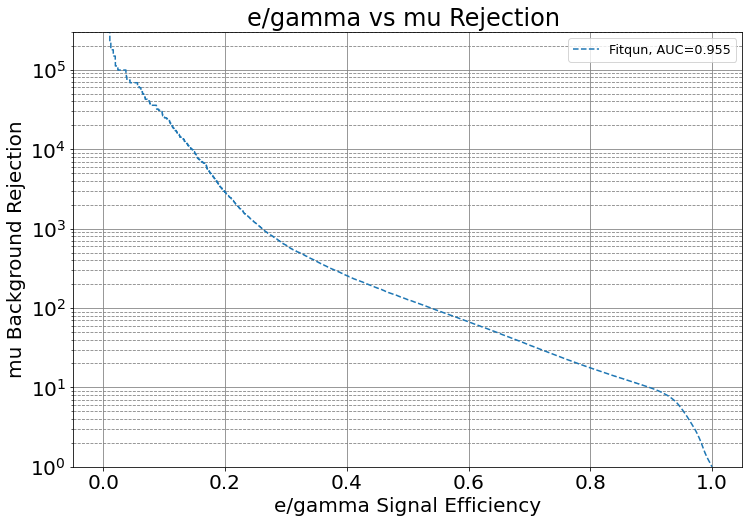

In [33]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list, "e/gamma", "mu", 
                      fig_list=[1], ylims=[[1,3e5]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)